<a href="https://colab.research.google.com/github/salvatoredebenedictis/ColabDocuments/blob/main/Image_to_Cartoon_(Adaptive_Threshold).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***Importazione Librerie***

In [ ]:
from google.colab.patches import cv2_imshow
from google.colab import files
import cv2
import numpy as np
import shutil
import os

## ***1.Caricamento delle immagini***

Creazione della funzione per il caricamento delle immagini

In [ ]:
def read_file(filename):
  img = cv2.imread(filename)
  return img

chiamata della funzione per il caricamento delle immagini

In [ ]:
# Se non esiste la cartella delle immagini, creiamola
if not os.path.exists("input_images/" ):
    os.makedirs("input_images/" )

# Caricamento delle immagini
print("Caricamento immagini ...")
uploaded = files.upload()
filename = next(iter(uploaded))
img = read_file(filename)
# Variabile per salvataggio dei nomi delle immagini caricate
filenames = uploaded.keys()
# Per ogni immagine caricata, spostiamola nella cartella delle immagini
for f in filenames:
    shutil.move(f, "input_images/" + f)
print("Caricamento immagini completato.")

Caricamento immagini ...


Saving 1.jpg to 1.jpg
Saving 2.jpg to 2.jpg
Saving 7.jpg to 7.jpg
Saving 8.jpg to 8.jpg
Caricamento immagini completato.


## ***2.Creazione della Maschera dei Bordi (Edge Mask)***

Funzione per la creazione della Edge Mask

In [ ]:
def edge_mask(img, line_size, blur_value):
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  gray_blur = cv2.medianBlur(gray, blur_value)
  edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, line_size, blur_value)
  return edges

settaggio del block size e della costante C e chiamata della funzione edge_mask

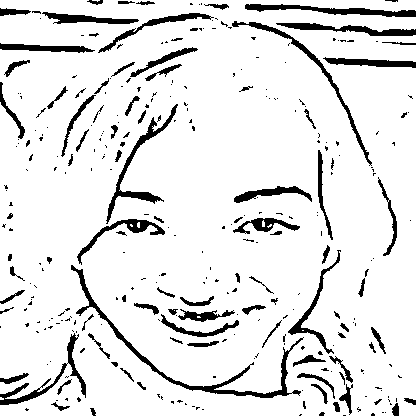

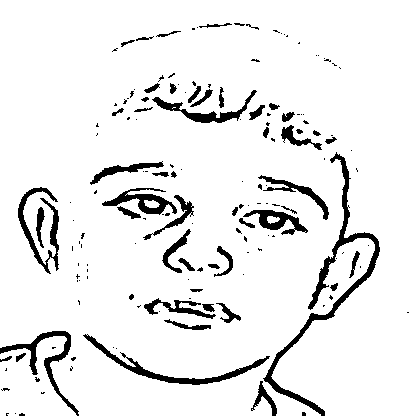

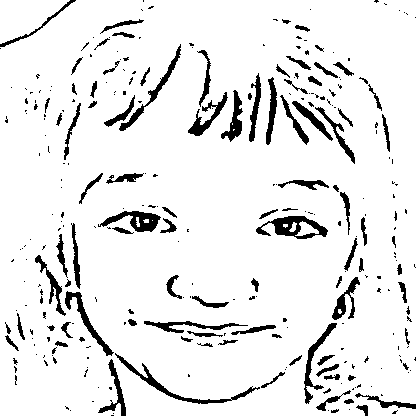

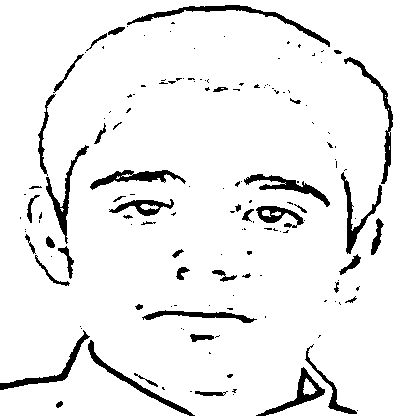

In [ ]:
line_size = 11
blur_value = 5

# Scansione della cartella di input
files = os.listdir("input_images")
i = 0
while i < len(files):
  img = cv2.imread("input_images/" + files[i]) 
  edges = edge_mask(img, line_size, blur_value)
  cv2_imshow(edges)
  i+=1

## ***3.Riduzione della palette dei colori***


Funzione per la color quantization

In [ ]:
def color_quantization(img, k):
# Trasformazione dell'immagine
  data = np.float32(img).reshape((-1, 3))

# scelta del criterio
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)

# Implementazione K-Means
  ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
  center = np.uint8(center)
  result = center[label.flatten()]
  result = result.reshape(img.shape)
  return result

settaggio del valore k che indica il numero di colori che vogliamo applicare alle immagini

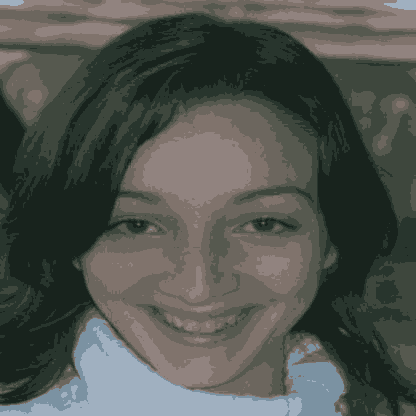

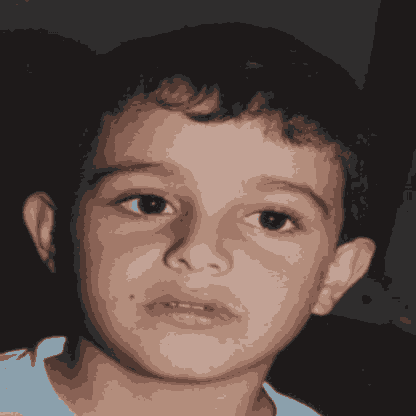

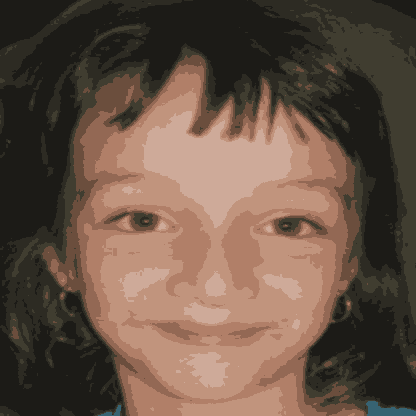

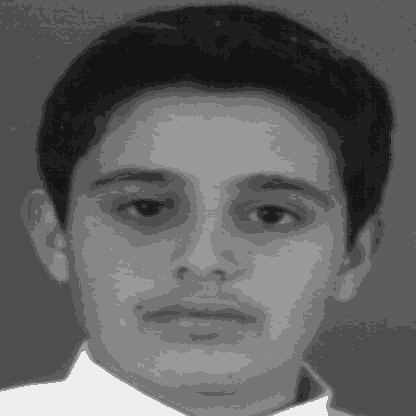

In [ ]:
total_color = 9
files = os.listdir("input_images")
i = 0
while i < len(files):
  img = cv2.imread("input_images/" + files[i]) 
  img = color_quantization(img, total_color)
  cv2_imshow(img)
  i+=1

###Color Quantization + Bilateral Filter

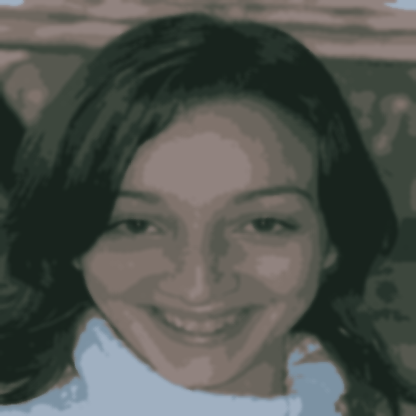

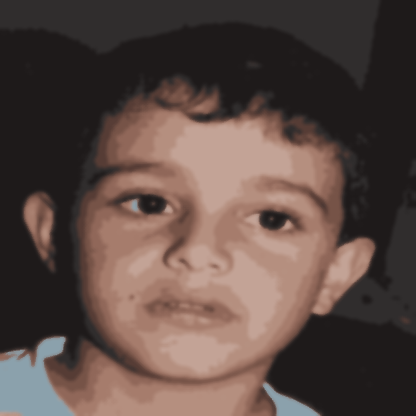

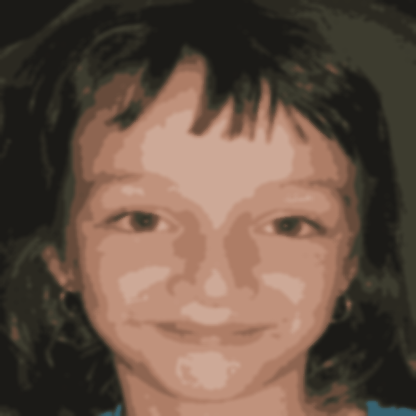

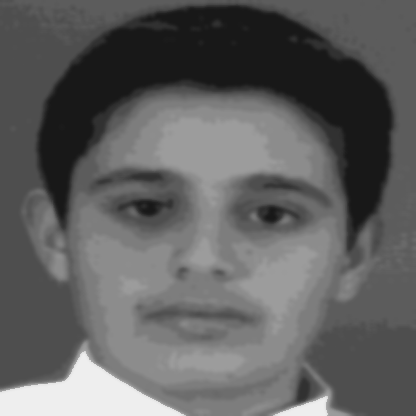

In [ ]:
i = 0
files = os.listdir("input_images")
while i < len(files):
  img = cv2.imread("input_images/" + files[i])
  img = color_quantization(img, total_color) 
  img = cv2.bilateralFilter(img, d=7, sigmaColor=150,sigmaSpace=200)
  cv2_imshow(img)
  i+=1

## ***4.Combinazione e unione della maschera per i bordi con l’immagine decolorata***

In [ ]:
if not os.path.exists("Result/" ):
    os.makedirs("Result/" )

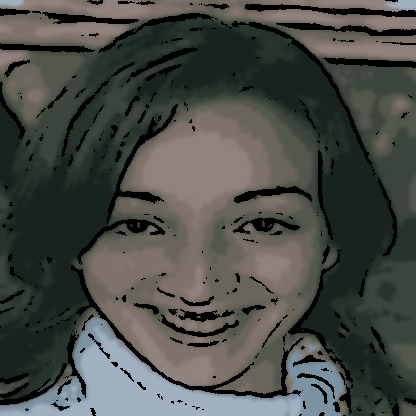

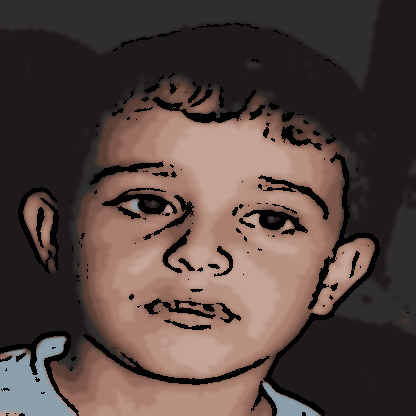

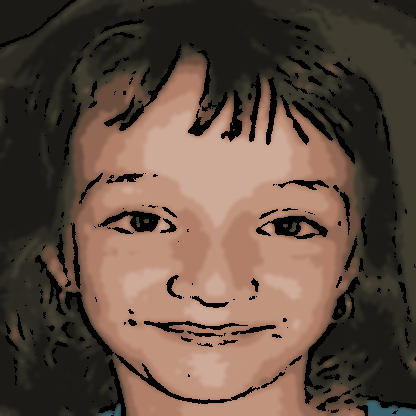

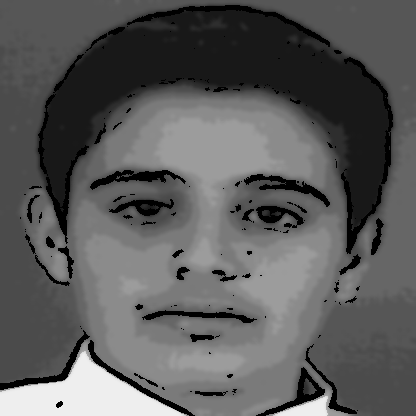

In [ ]:
i = 0
files = os.listdir("input_images")
while i < len(files):
  img = cv2.imread("input_images/" + files[i])
  edges = edge_mask(img, line_size, blur_value)
  imgdecolor = color_quantization(img, total_color) 
  imgbil = cv2.bilateralFilter(imgdecolor, d=7, sigmaColor=150,sigmaSpace=200)
  cartoon = cv2.bitwise_and(imgbil, imgbil, mask=edges)
  cv2_imshow(cartoon)

  path = 'Result/'+files[i]
  cv2.imwrite(path,cartoon)
  cv2.waitKey(0)
  i+=1

## ***5.Salvataggio ed esportazione in uno Zip***

In [ ]:
from google.colab import files
#genero lo zip della cartella da scaricare
!zip -r /content/Result/CartoonImages.zip  /content/Result

  adding: content/Result/ (stored 0%)
  adding: content/Result/2.jpg (deflated 1%)
  adding: content/Result/7.jpg (deflated 1%)
  adding: content/Result/1.jpg (deflated 0%)
  adding: content/Result/8.jpg (deflated 1%)


In [ ]:
#scarico la cartella
files.download("/content/Result/CartoonImages.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>